# **Spam Filter Using Naive Bayes Classification**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as cl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df = pd.read_csv("SPAM-text.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
ATTRS = ["bold"]
COLOR = "cyan"

print(cl("----------------------------------------------",attrs=['bold']))
print(
    cl(
        "The Dimension of the dataset is : {}".format(df.shape),
        attrs=ATTRS,
        color=COLOR,
    )
)

print(
    cl(
        "The Null Values in the dataset is : {}".format(df.isnull().sum().sum()),
        attrs=ATTRS,
        color=COLOR,
    )
)

print(
    cl(
        "The Duplicate Values in the dataset is : {}".format(df.duplicated().sum()),
        attrs=ATTRS,
        color=COLOR,
    )
)

# DROP DUPLICATES
df.drop_duplicates(inplace=True)
df["Message"]

----------------------------------------------
The Dimension of the dataset is : (5572, 2)
The Null Values in the dataset is : 0
The Duplicate Values in the dataset is : 415


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object

Since there were duplicates in the dataset, I dropped them.



In [8]:
df['Category'].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

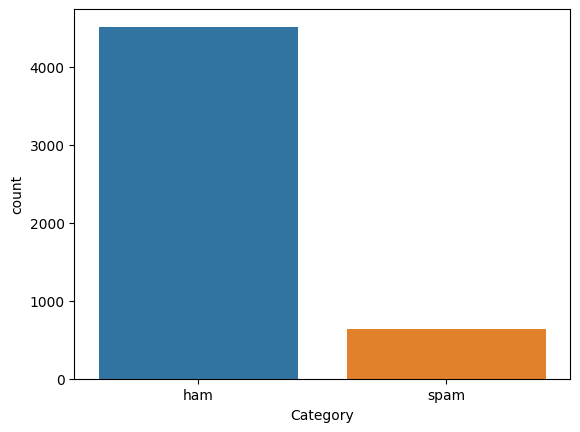

In [9]:
sns.countplot(x = 'Category',data=df)
plt.show()

In [10]:
msg = df['Message']
msg

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object

In [11]:
from nltk import TweetTokenizer
tk = TweetTokenizer() 
msg = msg.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
msg

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will ü b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Message, Length: 5157, dtype: object

Lets ***cleanup*** the data. We need to remove *commas*, *period*, *apostrophe*, *qoutation* etc and convert all the letters in the message to ***lower cases***. 

In [12]:
msg  = msg.str.replace('[^a-zA-Z0-9]+'," ",regex=True)
msg

0       Go until jurong point crazy Available only in ...
1                                Ok lar Joking wif u oni 
2       Free entry in 2 a wkly comp to win FA Cup fina...
3            U dun say so early hor U c already then say 
4       Nah I don t think he goes to usf he lives arou...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                   Will b going to esplanade fr home 
5569    Pity was in mood for that So any other suggest...
5570    The guy did some bitching but I acted like i d...
5571                            Rofl Its true to its name
Name: Message, Length: 5157, dtype: object

In [13]:
from nltk.tokenize import word_tokenize
msg = msg.apply(lambda x:" ".join([w for w in word_tokenize(x) if len(w)>=3]))
msg

0       until jurong point crazy Available only bugis ...
1                                      lar Joking wif oni
2       Free entry wkly comp win Cup final tkts 21st M...
3                      dun say early hor already then say
4         Nah don think goes usf lives around here though
                              ...                        
5567    This the 2nd time have tried contact have won ...
5568                            Will going esplanade home
5569         Pity was mood for that any other suggestions
5570    The guy did some bitching but acted like inter...
5571                               Rofl Its true its name
Name: Message, Length: 5157, dtype: object

In [14]:
from nltk import TweetTokenizer
tk = TweetTokenizer() 
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
msg = msg.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
msg

0       until jurong point crazi avail onli bugi great...
1                                        lar joke wif oni
2       free entri wkli comp win cup final tkts 21st m...
3                      dun say earli hor alreadi then say
4           nah don think goe usf live around here though
                              ...                        
5567    this the 2nd time have tri contact have won th...
5568                                will go esplanad home
5569             piti was mood for that ani other suggest
5570    the guy did some bitch but act like interest b...
5571                                 rofl it true it name
Name: Message, Length: 5157, dtype: object

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
train_data = vec.fit_transform(msg)
print(train_data)

  (0, 6663)	0.19248539629405484
  (0, 1006)	0.3482567760946992
  (0, 2981)	0.1609693750205711
  (0, 6162)	0.16636523872159056
  (0, 1775)	0.2937364096459484
  (0, 1546)	0.3323105911456516
  (0, 6843)	0.24308750729136344
  (0, 3018)	0.19401289435262045
  (0, 1548)	0.2937364096459484
  (0, 4528)	0.16895486109715593
  (0, 1194)	0.2640919733437643
  (0, 1975)	0.26901440584519726
  (0, 4827)	0.23800585136940136
  (0, 3589)	0.3482567760946992
  (0, 6481)	0.2444675833191814
  (1, 4526)	0.5869126419978632
  (1, 6766)	0.4622388118638354
  (1, 3558)	0.5009220368833591
  (1, 3722)	0.4369736198381139
  (2, 4603)	0.16460518761498844
  (2, 70)	0.268872740333254
  (2, 1079)	0.18664710864239029
  (2, 5085)	0.18027927870647353
  (2, 6400)	0.14009160795411812
  (2, 5838)	0.22678011978058826
  :	:
  (5154, 6658)	0.25438525855641886
  (5154, 6143)	0.1927247992001735
  (5154, 2748)	0.1866850000395078
  (5155, 1392)	0.3349945096997562
  (5155, 870)	0.34178705835675427
  (5155, 3435)	0.30445143356353327
  (5

In [16]:
train_data.shape

(5157, 6985)

I took Test data as **30%** of the total data records to maintain an optimum ratio of the "***ham***" and "***spam***" features.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(train_data, df["Category"], test_size=0.3, random_state=48)
print(cl("-----------------------------------------", attrs=ATTRS, color='red'))
print(cl("Train", attrs=ATTRS, color='green'))
print(cl(y_train.value_counts(normalize=True) * 100, attrs=ATTRS, color=COLOR))
print(cl("-----------------------------------------", attrs=ATTRS, color='red'))
print(cl("Test", attrs=ATTRS, color='green'))
print(cl(y_test.value_counts(normalize=True) * 100, attrs=ATTRS, color=COLOR))
print(cl("-----------------------------------------", attrs=ATTRS, color='red'))

-----------------------------------------
Train
ham     87.281796
spam    12.718204
Name: Category, dtype: float64
-----------------------------------------
Test
ham     88.242894
spam    11.757106
Name: Category, dtype: float64
-----------------------------------------


We can see that the proportion of the "***ham***" and "***spam***" messages are *preserved* in the train and test split. This is important when we split the dataset. We can ***graphically*** present the portion of spam and ham messages in train and test dataset.

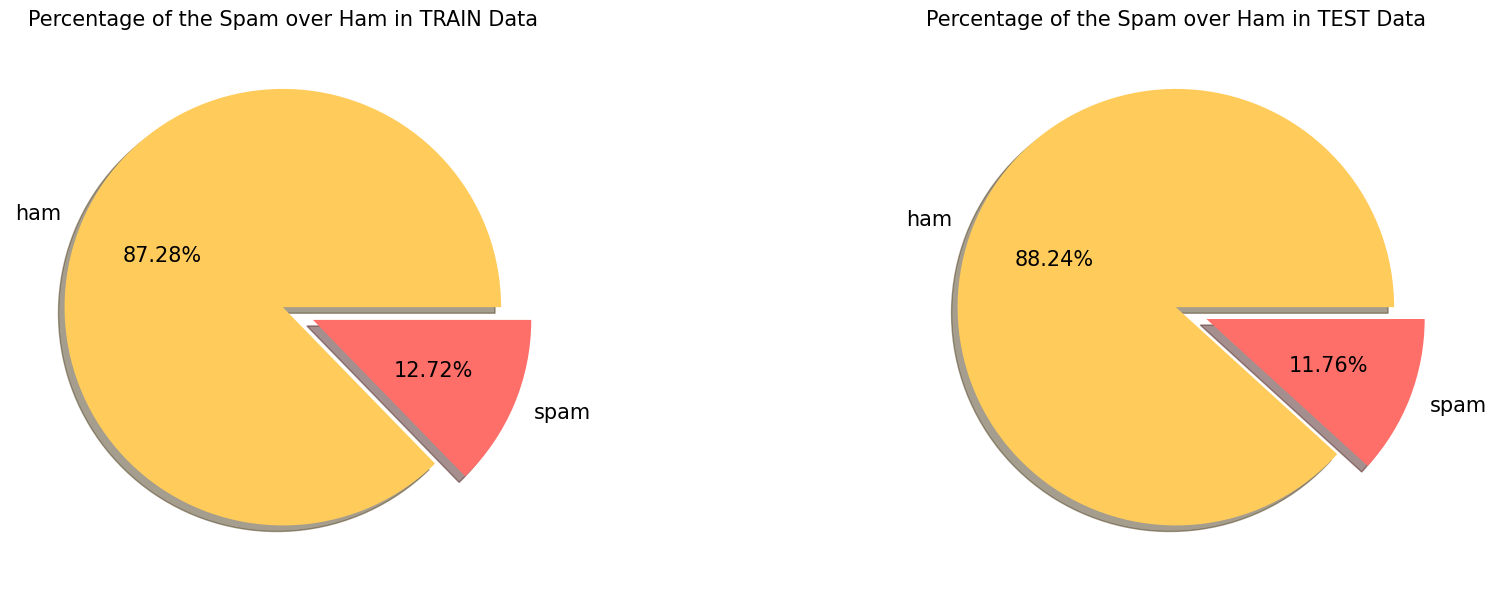

In [18]:
train_values = y_train.value_counts().values
test_values = y_test.value_counts().values
cases = y_train.value_counts().index
explode = (0, 0.15)
colors = ["#FFCC5C", "#FF6F69"]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

ax[0].pie(
    train_values,
    labels=cases,
    explode=explode,
    shadow=True,
    colors=colors,
    autopct="%.2f%%",
    textprops={"fontsize": 15},
)
ax[0].set_title("Percentage of the Spam over Ham in TRAIN Data", fontsize=15)
ax[1].pie(
    test_values,
    labels=cases,
    explode=explode,
    shadow=True,
    colors=colors,
    autopct="%.2f%%",
    textprops={"fontsize": 15},
)
ax[1].set_title("Percentage of the Spam over Ham in TEST Data", fontsize=15)
plt.tight_layout()

In [19]:
y_train

510     ham
4687    ham
4210    ham
1379    ham
3082    ham
       ... 
462     ham
991     ham
2503    ham
1406    ham
2739    ham
Name: Category, Length: 3609, dtype: object

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train,y_train)
y_pred = nb_model.predict(x_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [21]:
y_test

1609     ham
3611     ham
2408     ham
4164     ham
4269     ham
        ... 
2033     ham
161      ham
3481     ham
2850    spam
459      ham
Name: Category, Length: 1548, dtype: object

In [22]:
print(cl("-----------------------------------------", attrs=ATTRS, color='red'))
print(cl("Confusion Matrix :", attrs=ATTRS, color='green'))
print(cl(confusion_matrix(y_test, y_pred), attrs=ATTRS, color='cyan'))
print(cl("-----------------------------------------", attrs=ATTRS, color='red'))
print(cl("Classification Report :",attrs=ATTRS, color='green'))
print(cl(classification_report(y_test, y_pred),attrs=ATTRS, color='cyan'))
print(cl("-----------------------------------------", attrs=ATTRS, color='red'))
print(cl("Accuracy Score Percentage :",attrs=ATTRS, color='green'))
print(cl(float("{:.2f}".format(accuracy_score(y_pred,y_test)*100)),attrs=ATTRS,color='cyan'))
print(cl("-----------------------------------------", attrs=ATTRS, color='red'))

-----------------------------------------
Confusion Matrix :
[[1365    1]
 [  69  113]]
-----------------------------------------
Classification Report :
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1366
        spam       0.99      0.62      0.76       182

    accuracy                           0.95      1548
   macro avg       0.97      0.81      0.87      1548
weighted avg       0.96      0.95      0.95      1548

-----------------------------------------
Accuracy Score Percentage :
95.48
-----------------------------------------


We acquired an accuracy of **95%** using Naive Bayes Classifier.